# Evaluación 1

**Integrantes:**

+ Integrante 1: Neidan Martinez : neidan.martinez2201@ubiobio.cl
+ Integrante 2: Jean Muñoz : jean.munoz2201@ubiobio.cl
+ Integrante 2: Benjamin Escobar : Benjamin.escobar2201@ubiobio.cl

**Fecha de Entrega: 11 Abril 2025  
**Versión:** 1.0  

---

## Descripción

Este notebook contiene el desarrollo de la evaluación 1 de la asignatura de Inteligencia Artificial de la carrera Ingeniería Civil en Informática de la Universidad del Biío Bío - Sede Concepción

---

## Requisitos de Software

Este notebook fue desarrollado con Python 3.9. A continuación se listan las bibliotecas necesarias:

-
-
-

Para verificar la versión instalada ejecutar usando el nombre del paquete del cual quieres saber la versión; por ejemplo, si quieres saber la versión de sklearn usas:

```bash
import numpy
print(numpy.__version__)
````

# Conjunto de datos y descripción

In [ ]:
!wget https://raw.githubusercontent.com/JaznaLaProfe/InteligenciaArtificial/main/data/student_performance.csv

--2025-04-06 22:22:28--  https://raw.githubusercontent.com/JaznaLaProfe/InteligenciaArtificial/main/data/student_performance.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 172546 (169K) [text/plain]
Saving to: ‘student_performance.csv.1’

student_performance 100%[===================>] 168.50K  --.-KB/s    in 0.1s    

2025-04-06 22:22:28 (1.15 MB/s) - ‘student_performance.csv.1’ saved [172546/172546]



<table>
  <tr>
    <th>Columna</th>
    <th>Descripción</th>
  </tr>
  <tr>
    <td>Student_ID</td>
    <td>Identificador único del estudiante</td>
  </tr>
  <tr>
    <td>Hours_Studied</td>
    <td>Horas de estudio semanales</td>
  </tr>
  <tr>
    <td>Attendance_Rate</td>
    <td>Porcentaje de asistencia</td>
  </tr>
  <tr>
    <td>Assignments_Completed</td>
    <td>Núnero de tareas completadas</td>
  </tr>  
  <tr>
    <td>Midterm_Score</td>
    <td>Calificación del examen parcial (0-100)</td>
  </tr>
  <tr>
    <td>Final_Score</td>
    <td>Calificación del examen final (0-100)</td>
  </tr>
  <tr>
    <td>Project_Score</td>
    <td>Puntuación del proyecto final (0-100)</td>
  </tr>
  <tr>
    <td>Participation_Score</td>
    <td>Puntos por participación en clases(0-10)</td>
  </tr>
  <tr>
    <td>Study_Method</td>
    <td>Descripción del método de estudio (Kinesthetic, Visual, Auditory, Reading/ritting)</td>
  </tr>
</table>



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



---




In [ ]:
data = pd.read_csv("student_performance.csv")
data.head()

,Student_ID,Hours_Studied,Attendance_Rate,Assignments_Completed,Midterm_Score,Final_Score,Project_Score,Participation_Score,Study_Method
0,1,2,58,10,21,53,24,0,Kinesthetic
1,2,28,51,4,35,1,100,1,Visual
2,3,34,59,10,19,84,68,9,Auditory
3,4,38,62,2,27,24,66,5,Reading/Writing
4,5,17,83,3,67,100,28,8,Kinesthetic


# Cantidad de observaciones y características

In [ ]:
# Escriba acá su código

data.shape

(5000, 9)

---
✅ **Interpretación**

---

+ Existen 5000 estudiantes
+ De cada estudiante se tienen 9 características

#Detección de nulos

In [ ]:
# Escriba acá su código

data_final = data.drop("Student_ID", axis=1)
pd.DataFrame(data_final.isnull().sum(), columns=["Cantidad nulos"]).T


,Hours_Studied,Attendance_Rate,Assignments_Completed,Midterm_Score,Final_Score,Project_Score,Participation_Score,Study_Method
Cantidad nulos,0,0,0,0,0,0,0,0


---
✅ **Interpretación**

---

+ No tiene ninguna caracteristica que incluya valores nulos.

In [ ]:
data_final.describe()

,Hours_Studied,Attendance_Rate,Assignments_Completed,Midterm_Score,Final_Score,Project_Score,Participation_Score
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.00000
mean,20.243400,74.716200,5.002400,50.774400,49.66980,50.467200,5.05800
std,12.609931,15.470124,3.188546,29.198185,28.79476,28.912117,3.16655
min,-10.000000,10.000000,0.000000,0.000000,0.00000,0.000000,0.00000
25%,10.000000,62.000000,2.000000,26.000000,25.00000,26.000000,2.00000
50%,20.000000,75.000000,5.000000,51.000000,50.00000,50.000000,5.00000
75%,30.000000,88.000000,8.000000,76.000000,74.00000,75.000000,8.00000
max,98.000000,119.000000,10.000000,100.000000,100.00000,100.000000,10.00000


#Detección de atípicos

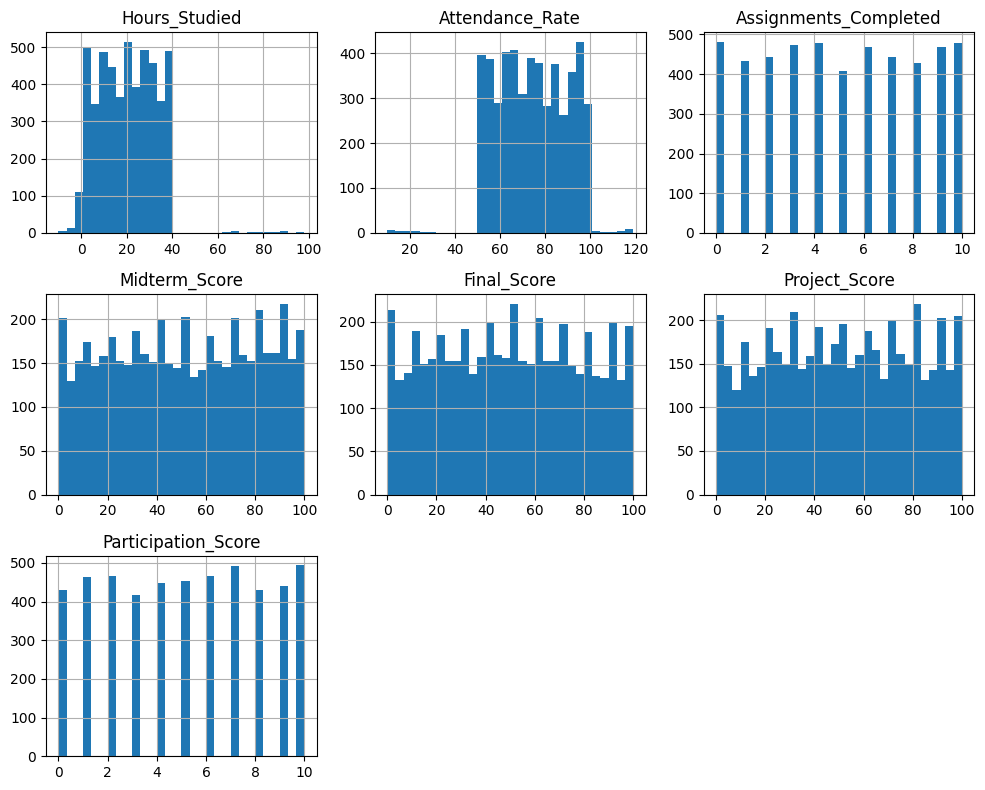

In [ ]:
# Escriba acá su código

# Distribución de variables numéricas, graficamos todas las columnas para averiguar cual presenta un sesgo, para luego evidenciar si tienen valores atípicos con el gráfico de cajas.
data_final[['Hours_Studied', 'Attendance_Rate', 'Assignments_Completed', 'Midterm_Score', 'Final_Score', 'Project_Score', 'Participation_Score']].hist(bins=30, figsize=(10, 8))
plt.tight_layout()
plt.show()

---
✅ **Interpretación**

---

1. Hours_Studied:
+ La mayoría de los estudiantes estudian entre 10 y 40 horas.
+ La distribución está muy sesgada a la derecha, es decir, es asimétrica.


2. Attendance_Rate:
+ XD


3. Assignments_Completed:
+ La mayoría de los estudiantes completaron entre 8 y 10 tareas.


4. Midterm_Score:


5. Final_Score:


6. Project_Score:


7. Participation_Score:


Conclusiones Generales:


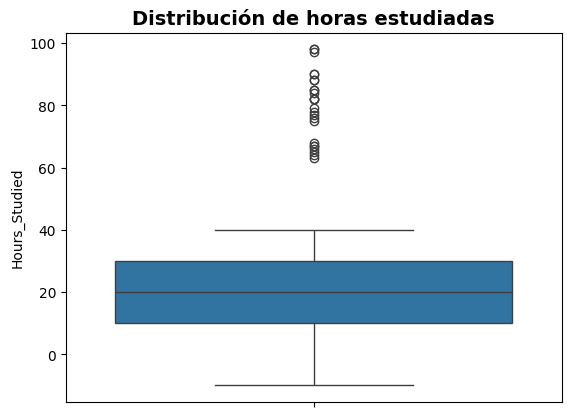

Límite inferior -5.0 - Límite superior : 45.5


In [ ]:
#Muestra gráfico de caja de la distribución de horas estudiadas, presentando evidentemente datos atípicos por encima del límite superior.
sns.boxplot(y='Hours_Studied', data=data_final)
plt.title("Distribución de horas estudiadas", fontsize=14, fontweight="bold")
plt.show()

mean, std = np.mean(data_final.Hours_Studied), np.std(data_final.Hours_Studied)
lim_inf, lim_sup = mean - 2*std, mean + 2*std
print("Límite inferior {0:.1f} - Límite superior : {1:.1f}".format(lim_inf, lim_sup))

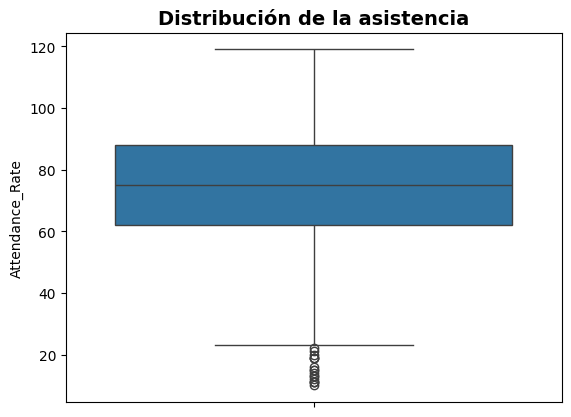

Límite inferior 43.8 - Límite superior : 105.7


In [ ]:
#Muestra el gráfico de la distribucíon de la asistencia, mostrando datos átipicos por debajo del límite inferior.
sns.boxplot(y='Attendance_Rate', data=data_final)
plt.title("Distribución de la asistencia", fontsize=14, fontweight="bold")
plt.show()
mean, std = np.mean(data_final.Attendance_Rate), np.std(data_final.Attendance_Rate)
lim_inf, lim_sup = mean - 2*std, mean + 2*std
print("Límite inferior {0:.1f} - Límite superior : {1:.1f}".format(lim_inf, lim_sup))

---
✅ **Interpretación**

---

+ Se detecta la presencia de atípicos tanto en la columna de horas estudiadas como en la de asistencias, donde se reconocen valores que se encuentran por sobre el límite superior y por debajo del líite inferior.

# Estadística descriptiva

## Variable continua

Deberá incluir el cálculo e interpretación de las siguientes medidas estadísticas:
+ Medidas de posición (primer, segundo y tercer cuartil)
+ Desviación estándar
+ Mediana agrupada
+ Promedio


In [ ]:
# Escriba acá su código

data_continua = data_final.drop(["Assignments_Completed", "Study_Method"], axis = 1)
data_continua.describe()

,Hours_Studied,Attendance_Rate,Midterm_Score,Final_Score,Project_Score,Participation_Score
count,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.00000
mean,20.243400,74.716200,50.774400,49.66980,50.467200,5.05800
std,12.609931,15.470124,29.198185,28.79476,28.912117,3.16655
min,-10.000000,10.000000,0.000000,0.00000,0.000000,0.00000
25%,10.000000,62.000000,26.000000,25.00000,26.000000,2.00000
50%,20.000000,75.000000,51.000000,50.00000,50.000000,5.00000
75%,30.000000,88.000000,76.000000,74.00000,75.000000,8.00000
max,98.000000,119.000000,100.000000,100.00000,100.000000,10.00000


---
✅ **Interpretación**

---
**1. Hours_Studied**
  - Una importante concentración de los estudiantes estudia la cantidad de horas dentro del intervalo [7.6 ; 32.8].
  - El 75% de los estudiantes estudia a lo más 30 horas.
  - El 25% de los estudiantes estudia a lo más 10 horas.

**2. Attendance_Rate**
  - Una importante concentración de los estudiantes tiene un % de asistencia dentro del intervalo [59.2 ; 90.2].
  - El 75% de los estudiantes tiene un % de asistencia de a lo más 88%.
  - El 25% de los estudiantes tiene un % de asistencia de a lo más 62%.
  
**3. Midterm_Score**
  - Una importante concentración de los estudiantes tiene un midterm score dentro del intervalo [21.6 ; 80].
  - El 75% de los estudiantes tiene a lo más 76 Midterm_score.
  - El 25% de los estudiantes tiene a lo más 26 Midterm_score.

**4. Final_Score**
  - Una importante concentración de los estudiantes tiene un final score dentro del intervalo [20.9 ; 78.5].
  - El 75% de los estudiantes tiene a lo más 74 Final_score.
  - El 25% de los estudiantes tiene a lo más 25 Final_score.

**5. Project_Score**
  - Una importante concentración de los estudiantes tiene un project score dentro del intervalo [21.6 ; 79.4].
  - El 75% de los estudiantes tiene a lo más 75 Project_score.
  - El 25% de los estudiantes tiene a lo más 26 Project_score.

**6. Participation_Score**
  - Una importante concentración de los estudiantes tiene un participation score dentro del intervalo [1.9 ; 8.3].
  - El 75% de los estudiantes tiene a lo más 8 Participation_score.
  - El 25% de los estudiantes tiene a lo más 2 Participation_score.

## Variable discreta

In [ ]:
#Escriba acá su código

data_discreta = data_final.drop(["Hours_Studied", "Attendance_Rate", "Midterm_Score", "Final_Score", "Project_Score", "Participation_Score", "Study_Method"], axis = 1)
# data_discreta.head()

data_discreta.describe()

,Assignments_Completed
count,5000.000000
mean,5.002400
std,3.188546
min,0.000000
25%,2.000000
50%,5.000000
75%,8.000000
max,10.000000


---
✅ **Interpretación**

---
1. Assignments_Completed
  - Una importante concentración de los estudiantes tiene tareas completadas dentro del intervalo [2 ; 8].
  - El 75% de los estudiantes completó a lo más 8 tareas.
  - El 25% de los estudiantes completó a lo más 2 tareas.

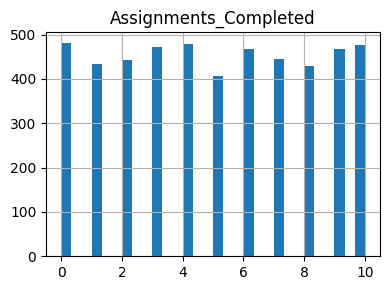

In [ ]:
data_discreta[["Assignments_Completed"]].hist(bins = 30, figsize = (4, 3))
plt.tight_layout()
plt.show()


# sns.boxplot(y='Assignments_Completed', data=data_discreta)
# plt.title("Distribución de tareas completadas", fontsize=14, fontweight="bold")
# plt.show()

# Análisis de frecuencia de método de estudio

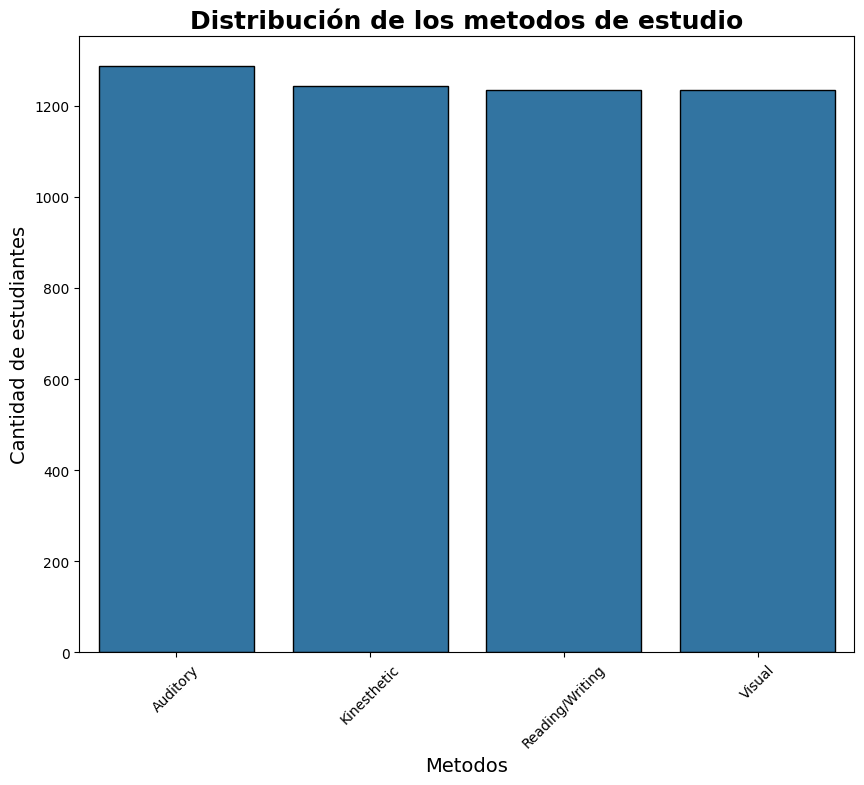

In [ ]:
valores = data.groupby('Study_Method')['Study_Method'].count().sort_values(ascending = False)
titulo = u"Distribución de los metodos de estudio"
# Tamaño del grafico: (ancho, largo)
plt.figure(figsize=(10,8))

# Usamos el gráfico de barras de seaborn
sns.barplot(x=valores.index, y=valores, edgecolor='black')

# Asignamos etiquetas a eje x, y asi como tambien el titulo del gráfico
plt.xlabel('Metodos', fontsize=14)
plt.xticks(rotation=45)
plt.ylabel('Cantidad de estudiantes', fontsize=14)
plt.title(titulo, fontsize=18, fontweight="bold")

plt.show()

In [ ]:
valores

---
✅ Interpretación

---


+ El gráfico muestra que la distribución de los métodos de estudio entre los estudiantes es bastante equilibrada, con una ligera preferencia por el estilo auditivo, que presenta la mayor cantidad de estudiantes

# Análisis de simetría/asimetría

## Variable elegida por el equipo que será analizada

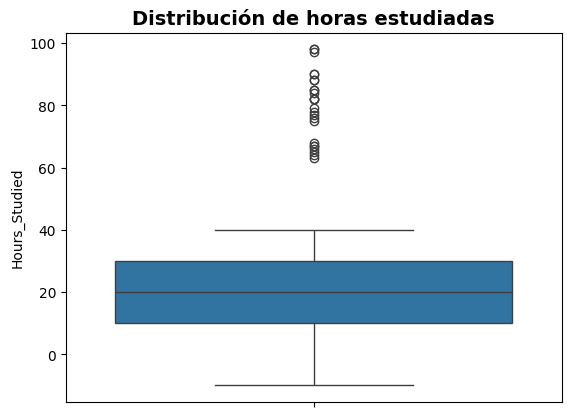

Extremo inferior -5.0 - Extremo superior : 45.5
El valor mayor registrado es de: 99.24 %


In [ ]:
#Muestra el gráfico.
sns.boxplot(y='Hours_Studied', data=data_final)
plt.title("Distribución de horas estudiadas", fontsize=14, fontweight="bold")
plt.show()

# Calcula y muestra el intervalo exacto de la mayor concentración
mean, std = np.mean(data.Hours_Studied), np.std(data.Hours_Studied)
lim_inf, lim_sup = mean - 2*std, mean + 2*std
print("Extremo inferior {0:.1f} - Extremo superior : {1:.1f}".format(lim_inf, lim_sup))

# Busca las ocurrencias
analizados = data.query("Hours_Studied >= {0} & Hours_Studied <= {1}".format(lim_inf, lim_sup))['Hours_Studied'].count()
total = data.shape[0]
print(f"El valor mayor registrado es de:",analizados/total*100,"%")

---
✅ **Interpretación**

---

+ La mayoría de los estudiantes estudia entre aproximadamente 10 y 30 horas
+ La mediana se encuentra al rededor de las 20 horas
+ Hay algunos casos con valores más bajos, incluyendo un valor mínimo de -5 horas, lo cual probablemente sea un error de registro
+ Se observa una gran cantidad de valores atípicos por encima del rango superior, llegando incluso hasta las 99.24 horas.


# Visualizaciones

## Distribución de una variable continua

Variable continua seleccionada: Attendance_Rate (tasa de asistencia)

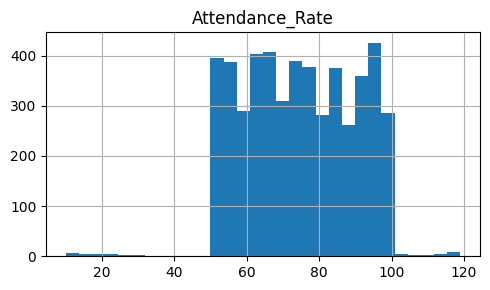

In [ ]:
# Histograma

data_final[['Attendance_Rate']].hist(bins = 30, figsize = (5, 3))
plt.tight_layout()
plt.show()

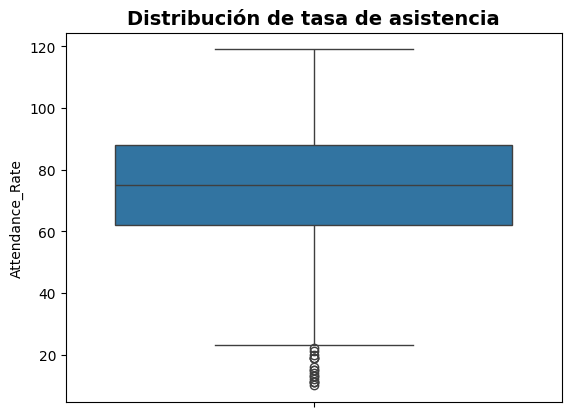

In [ ]:
# Diagrama de cajón

sns.boxplot(y='Attendance_Rate', data = data_final)
plt.title("Distribución de tasa de asistencia", fontsize = 14, fontweight = "bold")
plt.show()

In [ ]:
# Calcula y muestra el intervalo exacto de la mayor concentración
mean, std = np.mean(data_final.Attendance_Rate), np.std(data_final.Attendance_Rate)
lim_inf, lim_sup = mean - 2*std, mean + 2*std
print("Límite inferior {0:.1f} - Límite superior : {1:.1f}".format(lim_inf, lim_sup))

Límite inferior 43.8 - Límite superior : 105.7


In [ ]:
#En este caso la moda es 116, que es un valor distinto al que se presenta en el gráfico, que aproximadamente seria 95.
moda = data_final.groupby('Attendance_Rate')['Attendance_Rate'].count().sort_values(ascending = False)[:1].values[0]
mediana = np.quantile(data_final.Attendance_Rate, 0.5)
media = np.mean(data_final.Attendance_Rate)
print("Moda {0} - Mediana {1} - Media {2}".format(moda, mediana, media))

Moda 116 - Mediana 75.0 - Media 74.7162


---
✅ **Interpretación**

---
- La distribución tiene sesgo a la izquierda, por lo tanto es asimétrica.
- La mayoría de los estudiantes tiene una tasa de asistencia entre 59 y 89.
- Hay pocos estudiantes con más de 100 de tasa de asistencia.

## Distribucion de una variable discreta

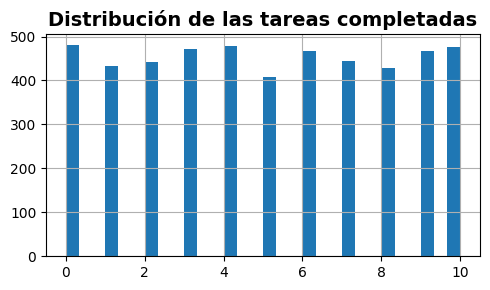

In [ ]:
# Escriba acá su código
data_final[['Assignments_Completed']].hist(bins = 30, figsize = (5, 3))
plt.title("Distribución de las tareas completadas", fontsize = 14, fontweight = "bold")
plt.tight_layout()
plt.show()

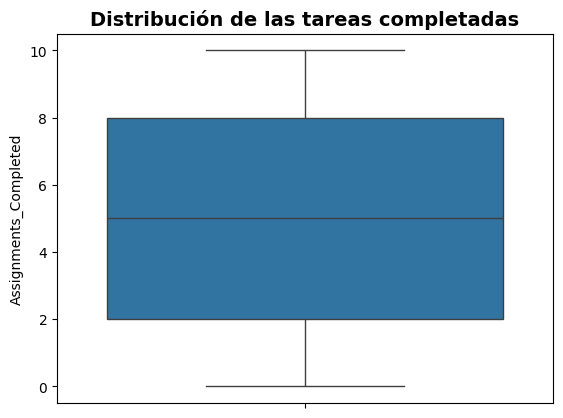

In [ ]:
#Muestra el gráfico de cajas de Assignments_Completed
sns.boxplot(y='Assignments_Completed', data = data_final)
plt.title("Distribución de las tareas completadas", fontsize = 14, fontweight = "bold")
plt.show()

In [ ]:
# Calcula y muestra el intervalo exacto de la mayor concentración
mean, std = np.mean(data_final.Assignments_Completed), np.std(data_final.Assignments_Completed)
lim_inf, lim_sup = mean - 2*std, mean + 2*std
print("Límite inferior {0:.1f} - Límite superior : {1:.1f}".format(lim_inf, lim_sup))

Límite inferior -1.4 - Límite superior : 11.4


In [94]:
#Aqui utilizamos una ecuación diferente, ya que en este caso si muestra una moda coeherente con el gráfico.
moda = data_final['Assignments_Completed'].mode()[0]
mediana = np.quantile(data_final.Assignments_Completed, 0.5)
media = np.mean(data_final.Attendance_Rate)
print("Moda {0} - Mediana {1} - Media {2}".format(moda, mediana, media))

Moda 0 - Mediana 5.0 - Media 74.7162


---
✅ **Interpretación**

---


+ Escriba acá sus interpretaciones

# Insight

## Insight 1 – Participación y rendimiento

¿Los estudiantes con mayor participación (Participation_Score) tienen mejores Final_Score?



In [ ]:
# Escriba acá su código

---
✅ **Interpretación**

---


+ Escriba acá sus interpretaciones

##Insight 2 – Método de estudio más efectivo

¿Cuál Study_Method está asociado con mayor promedio de Final_Score?



In [ ]:
# Escriba acá su código

---
✅ **Interpretación**

---


+ Escriba acá sus interpretaciones

##Insight 3 – Correlación horas de estudio vs. score final

¿Qué tan fuerte es la correlación entre Hours_Studied y Final_Score?



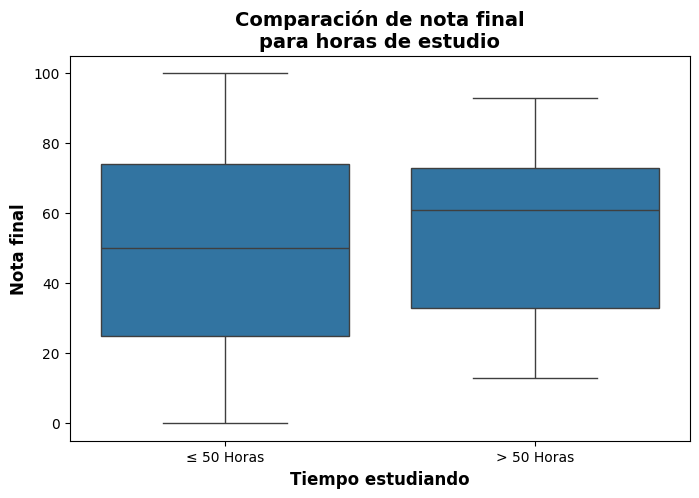

In [ ]:
#Definir umbral de 50 minutos
threshold = 50
plt.figure(figsize=(8, 5))
sns.boxplot(x=np.where(data_final["Hours_Studied"] <= threshold, "≤ 50 Horas", "> 50 Horas"),
            y=data_final["Final_Score"])
plt.title("Comparación de nota final\npara horas de estudio", fontsize=14, fontweight="bold")
plt.xlabel("Tiempo estudiando", fontsize=12, fontweight="bold")
plt.ylabel("Nota final", fontsize=12, fontweight="bold")
plt.show()

---
✅ **Interpretación**

---

1. Estudiantes con más de 50 horas de estudio:

+ Tienen una mediana más alta de nota final, lo que indica un mejor rendimiento en promedio.

+ Presentan una distribución más concentrada en los valores altos, con menos dispersión.

2. Estudiantes con 50 horas o menos:

+ La mediana es más baja, en comparacion a los estudiantes que estudian más de 50 horas.

+ Hay casos de notas muy bajas, incluso cercanas a cero.

##Insight 4 – Identificación de valores atípicos extremos

¿Cuántos estudiantes tienen valores de Attendance_Rate fuera del rango [50, 100]? ¿Cómo se comportan sus otras métricas?

In [ ]:
# Escriba acá su código

---
✅ **Interpretación**

---

+ Escriba acá sus interpretaciones

##Insight propuesto por el equipo

Redacte acá el insight propuesto por el equipo

In [ ]:
# Escriba acá su código

---
✅ **Interpretación**

---

+ Escriba acá sus interpretaciones